In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
data = pd.read_csv('../data/interim/2018-19_relevant_columns.csv')

In [3]:
schools = data[data.Type == 'School']
schools = schools.dropna(subset=['Grades Served']).reset_index()
high_schools = schools[schools['Grades Served'].str.contains('12', na=False)]

In [4]:
high_schools.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1441 entries, 0 to 7740
Data columns (total 73 columns):
index                                                               1441 non-null int64
Unnamed: 0                                                          1441 non-null int64
RCDTS                                                               1441 non-null object
Type                                                                1441 non-null object
School Name                                                         1441 non-null object
District                                                            1441 non-null object
City                                                                1441 non-null object
County                                                              1441 non-null object
District Type                                                       1433 non-null object
District Size                                                       1425 non-null object
Schoo

In [5]:
def calc_average_sat_level(row):
    return (np.array(row) / 100).dot([1, 2, 3, 4])

In [6]:
with_sat = high_schools[~high_schools['# Students SAT Math Participation'].isna()]

In [7]:
with_sat['avg_math_sat_level'] = with_sat[[x for x in high_schools.columns if 'SAT Math Total' in x]].apply(calc_average_sat_level, axis=1)
with_sat['avg_reading_sat_level'] = with_sat[[x for x in high_schools.columns if 'SAT Reading Total' in x]].apply(calc_average_sat_level, axis=1)


/Users/willyraedy/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/willyraedy/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
with_sat.describe()

,index,Unnamed: 0,# Student Enrollment,% Student Enrollment - White,% Student Enrollment - Black or African American,% Student Enrollment - Hispanic or Latino,% Student Enrollment - Asian,% Student Enrollment - Native Hawaiian or Other Pacific Islander,% Student Enrollment - American Indian or Alaska Native,% Student Enrollment - Two or More Races,...,SAT Math Total Students Level 2 %,SAT Math Total Students Level 3 %,SAT Math Total Students Level 4 %,# Students SAT Math Participation,% Students SAT Math Participation,# Students SAT ELA Participation,% SAT ELA Participation,Year,avg_math_sat_level,avg_reading_sat_level
count,1414.000000,1414.000000,1414.000000,1268.000000,1003.000000,1107.000000,711.000000,256.000000,428.000000,948.000000,...,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000
mean,4792.164074,4792.164074,852.419378,66.110331,25.098405,22.025203,4.454712,0.272656,0.395561,3.298945,...,33.617610,21.131047,4.955092,198.119519,97.884866,198.119519,97.884866,2018.498586,1.901163,2.057547
std,2837.568257,2837.568257,855.220287,34.007176,33.434896,26.219403,6.260365,0.285661,0.312958,2.571207,...,10.157685,12.946450,7.676083,208.383501,4.389490,208.383501,4.389490,0.500175,0.452396,0.429319
min,1.000000,1.000000,21.000000,0.100000,0.200000,0.200000,0.100000,0.000000,0.000000,0.100000,...,1.400000,0.000000,0.000000,10.000000,43.600000,10.000000,43.600000,2018.000000,0.724000,0.784000
25%,2152.750000,2152.750000,223.000000,41.875000,1.900000,3.200000,0.800000,0.100000,0.200000,1.700000,...,28.600000,10.925000,0.000000,50.000000,97.800000,50.000000,97.800000,2018.000000,1.610250,1.811000
50%,4743.500000,4743.500000,474.500000,82.850000,7.300000,10.400000,1.800000,0.200000,0.300000,2.850000,...,34.500000,20.900000,2.200000,106.000000,99.400000,106.000000,99.400000,2018.000000,1.884500,2.080500
75%,7310.750000,7310.750000,1283.000000,94.000000,36.350000,30.150000,5.400000,0.325000,0.500000,4.200000,...,40.000000,30.500000,6.300000,292.000000,100.000000,292.000000,100.000000,2019.000000,2.168000,2.312750
max,9472.000000,9472.000000,4609.000000,100.000000,100.000000,98.800000,36.800000,2.400000,2.300000,28.600000,...,66.700000,62.500000,67.300000,1146.000000,100.000000,1146.000000,100.000000,2019.000000,3.641000,3.784000


In [9]:
identifying_info = [
    'RCDTS',
    'Type',
    'School Name',
    'District',
    'City',
    'County',
    'District Type',
    'District Size',
    'School Type',
    'Grades Served',
    'Year'
]

features = [
    '# Student Enrollment',
    '% Student Enrollment - Low Income',
    'Avg Class Size – All Grades',
    'Teacher Retention Rate',
    'Principal Turnover within 6 Years',
    '% EBF Capacity to Meet Expectations',
    'avg_math_sat_level'
]


just_features = with_sat[identifying_info + features].dropna(subset=features)

In [10]:
just_features = just_features.rename(columns={
    '# Student Enrollment': 'enrollment',
    '% Student Enrollment - Low Income': 'low_inc_perc',
    'Avg Class Size – All Grades': 'avg_class_size',
    'Teacher Retention Rate': 'teach_retention',
    'Principal Turnover within 6 Years': 'principle_turnover',
    '% EBF Capacity to Meet Expectations': 'ebf_capacity',
})

In [11]:
just_features.describe()

,Year,enrollment,low_inc_perc,avg_class_size,teach_retention,principle_turnover,ebf_capacity,avg_math_sat_level
count,686.0,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,2019.0,863.205539,48.728426,19.304810,84.039942,1.998542,73.726239,1.897660
std,0.0,864.528674,25.856142,5.415705,15.377959,1.220864,19.815418,0.454803
min,2019.0,42.000000,0.600000,2.700000,0.000000,1.000000,53.200000,0.724000
25%,2019.0,219.000000,30.400000,15.125000,81.800000,1.000000,63.900000,1.605250
50%,2019.0,474.500000,43.300000,19.700000,88.050000,2.000000,65.300000,1.882500
75%,2019.0,1309.250000,65.075000,23.400000,92.300000,2.000000,75.375000,2.148500
max,2019.0,4606.000000,100.000000,33.000000,100.000000,19.000000,190.300000,3.561000


In [12]:
feature_names = ['enrollment', 'low_inc_perc', 'avg_class_size', 'teach_retention', 'principle_turnover', 'ebf_capacity', 'avg_math_sat_level']

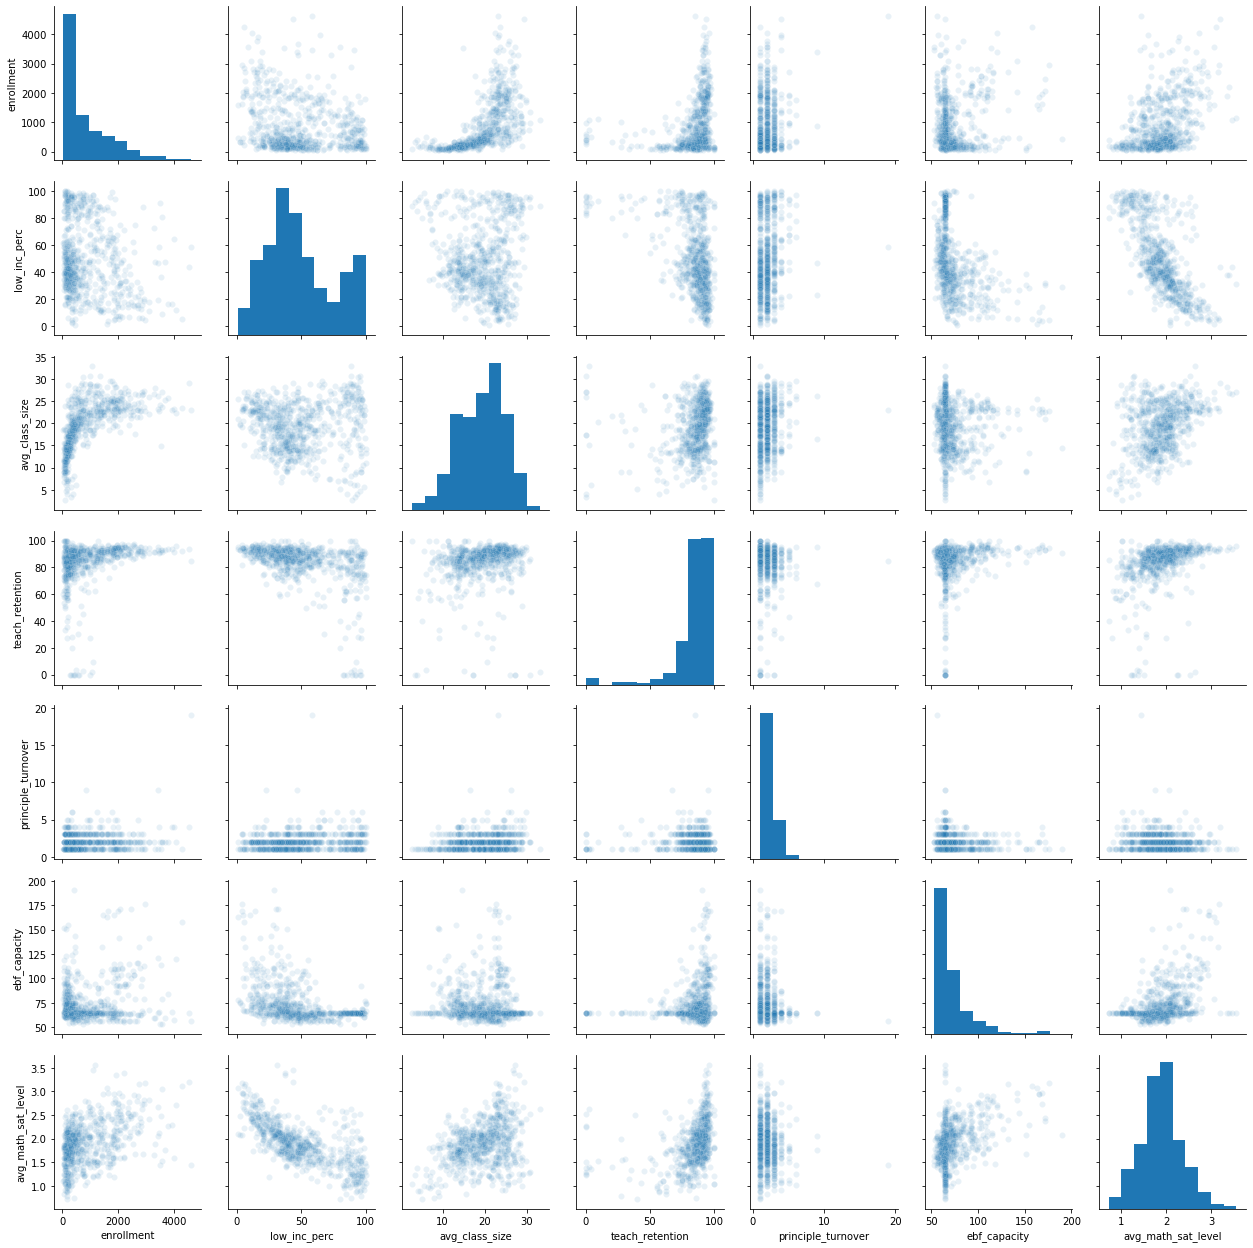

In [13]:
sns.pairplot(just_features[feature_names], plot_kws={'alpha': 0.1})

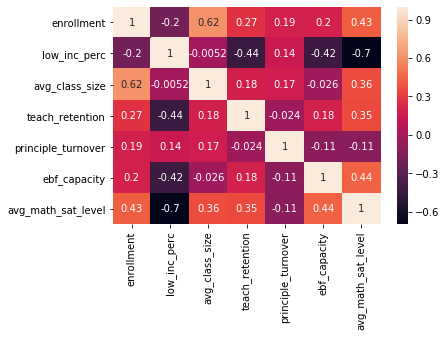

In [14]:
sns.heatmap(just_features[feature_names].corr(), annot=True)

In [15]:
just_features.columns

Index(['RCDTS', 'Type', 'School Name', 'District', 'City', 'County',
       'District Type', 'District Size', 'School Type', 'Grades Served',
       'Year', 'enrollment', 'low_inc_perc', 'avg_class_size',
       'teach_retention', 'principle_turnover', 'ebf_capacity',
       'avg_math_sat_level'],
      dtype='object')

In [16]:
y_name = feature_names[-1]
x_eqn = ' + '.join(feature_names[:-1])
lm1 = smf.ols(f'{y_name} ~ {x_eqn}', data=just_features)

# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     avg_math_sat_level   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     216.4
Date:                Fri, 17 Jan 2020   Prob (F-statistic):          6.05e-154
Time:                        14:38:15   Log-Likelihood:                -65.726
No. Observations:                 686   AIC:                             145.5
Df Residuals:                     679   BIC:                             177.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.6934      0.099     17.125      0.000       1.499       1.888
enrollment          5.036e-05   1.61e-05      3.130      0.002    1.88e-05    8.19e-05
low_inc_perc          -0.0107      0.000    -22.073      0.000      -0.012      -0.010
avg_class_size         0.0273      0.002     11.095      0.000       0.022       0.032
teach_retention       -0.0009      0.001     -1.216      0.225      -0.002       0.001
principle_turnover    -0.0292      0.009     -3.350      0.001      -0.046      -0.012
ebf_capacity           0.0039      0.001      6.766      0.000       0.003       0.005
==============================================================================
Omnibus:                      138.107   Durbin-Watson:                   1.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              420.413
Skew:                           0.967   Prob(JB):                     5.11e-92
Kurtosis:                       6.311   Cond. No.                     1.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

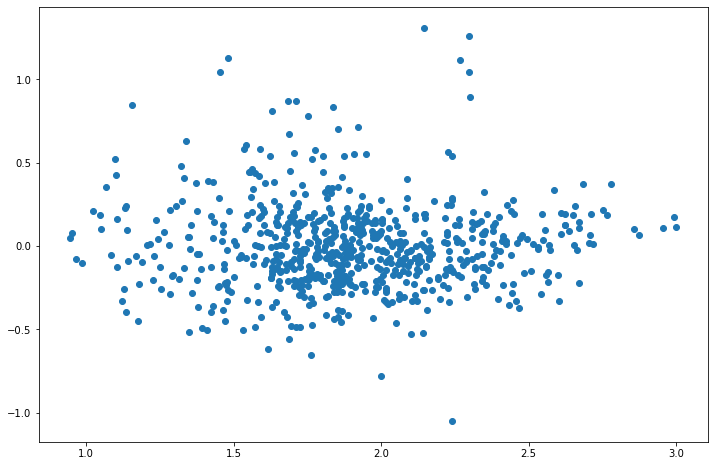

In [17]:
plt.figure(figsize=(12,8))
plt.scatter(fit1.predict(), fit1.resid);

In [18]:
just_features[just_features.ebf_capacity == 64.3].District.value_counts()
# City of Chicago SD 299 is a weird district with 138 schools with exactly the same EBF

City of Chicago SD 299    138
CUSD 300                    4
Canton Union SD 66          1
Name: District, dtype: int64

In [19]:
just_features.District.value_counts()

City of Chicago SD 299          138
Township HSD 214                  6
SD U-46                           5
Township HSD 211                  5
Glenbard Twp HSD 87               4
                               ... 
Forrestville Valley CUSD 221      1
Byron CUSD 226                    1
Hartsburg Emden CUSD 21           1
North Clay CUSD 25                1
Charleston CUSD 1                 1
Name: District, Length: 467, dtype: int64

In [20]:
just_features[just_features.District == 'Township HSD 214'].describe()

,Year,enrollment,low_inc_perc,avg_class_size,teach_retention,principle_turnover,ebf_capacity,avg_math_sat_level
count,6.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000e+00,6.000000
mean,2019.0,1926.333333,19.983333,24.333333,95.083333,1.500000,1.096000e+02,2.494500
std,0.0,131.087248,11.106650,0.900370,0.884119,0.547723,1.556721e-14,0.354619
min,2019.0,1739.000000,6.800000,23.500000,94.200000,1.000000,1.096000e+02,2.061000
25%,2019.0,1871.750000,12.575000,23.550000,94.425000,1.000000,1.096000e+02,2.210750
50%,2019.0,1921.000000,18.100000,24.150000,94.900000,1.500000,1.096000e+02,2.499000
75%,2019.0,1971.750000,26.700000,24.975000,95.525000,2.000000,1.096000e+02,2.790250
max,2019.0,2133.000000,36.600000,25.600000,96.500000,2.000000,1.096000e+02,2.906000


In [21]:
super_limited = just_features[(just_features.District != 'City of Chicago SD 299') & (just_features.Year == 2019)]

In [22]:
super_limited.shape

(548, 18)

In [23]:
y_name = feature_names[-1]
x_eqn = ' + '.join(feature_names[:-1])
lm1 = smf.ols(f'{y_name} ~ {x_eqn}', data=super_limited)

# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     avg_math_sat_level   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     235.1
Date:                Fri, 17 Jan 2020   Prob (F-statistic):          3.66e-147
Time:                        14:38:16   Log-Likelihood:                 102.61
No. Observations:                 548   AIC:                            -191.2
Df Residuals:                     541   BIC:                            -161.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.3751      0.133     10.362      0.000       1.114       1.636
enrollment          4.737e-05   1.53e-05      3.095      0.002    1.73e-05    7.74e-05
low_inc_perc          -0.0111      0.001    -21.740      0.000      -0.012      -0.010
avg_class_size         0.0149      0.003      5.012      0.000       0.009       0.021
teach_retention        0.0050      0.001      3.914      0.000       0.003       0.008
principle_turnover    -0.0141      0.008     -1.789      0.074      -0.030       0.001
ebf_capacity           0.0040      0.000      8.755      0.000       0.003       0.005
==============================================================================
Omnibus:                       14.542   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               29.403
Skew:                          -0.005   Prob(JB):                     4.12e-07
Kurtosis:                       4.135   Cond. No.                     1.97e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
super_limited.describe()

,Year,enrollment,low_inc_perc,avg_class_size,teach_retention,principle_turnover,ebf_capacity,avg_math_sat_level
count,548.0,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,2019.0,897.910584,39.742153,18.728102,87.220438,1.945255,76.100000,1.970571
std,0.0,904.882214,19.619563,4.562142,7.845633,1.171225,21.532514,0.381455
min,2019.0,42.000000,0.600000,6.800000,30.400000,1.000000,53.200000,0.999000
25%,2019.0,216.250000,26.700000,14.875000,84.150000,1.000000,62.975000,1.705250
50%,2019.0,465.000000,38.550000,19.100000,88.900000,2.000000,68.700000,1.944000
75%,2019.0,1432.000000,50.625000,22.700000,92.525000,2.000000,80.775000,2.173750
max,2019.0,4606.000000,100.000000,28.100000,100.000000,19.000000,190.300000,3.170000


/Users/willyraedy/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


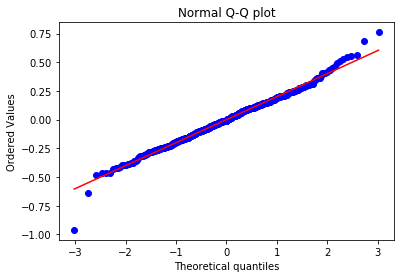

In [29]:
# diagnose/inspect residual normality using qqplot:
super_limited['resid'] = super_limited.avg_math_sat_level - fit1.predict()
stats.probplot(super_limited['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

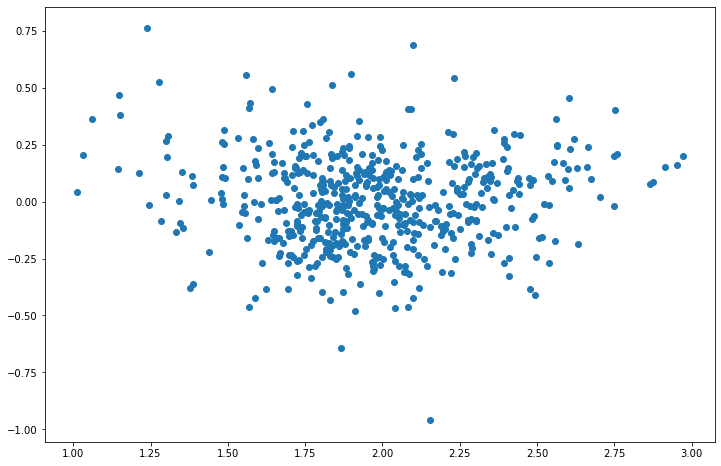

In [30]:
plt.figure(figsize=(12,8))
plt.scatter(fit1.predict(), fit1.resid);